### Afwa Afini | PYTN-KS20-018


#### Introduction

    Assignment 1 mengimplementasikan pemahaman terhadap visualisasi data menggunakan Python.
    

#### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mpl.style.use('ggplot')
print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.7.2


In [6]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [7]:
df.shape

(13490604, 7)

In [8]:
df.isna().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [11]:
df.describe(include='all')

,lsoa_code,borough,major_category,minor_category,value,year,month
count,13490604,13490604,13490604,13490604,1.349060e+07,1.349060e+07,1.349060e+07
unique,4835,33,9,32,NaN,NaN,NaN
top,E01003689,Croydon,Theft and Handling,Common Assault,NaN,NaN,NaN
freq,3456,602100,3966300,522180,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.779444e-01,2.012000e+03,6.500000e+00
std,NaN,NaN,NaN,NaN,1.771513e+00,2.581989e+00,3.452053e+00
min,NaN,NaN,NaN,NaN,0.000000e+00,2.008000e+03,1.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,2.010000e+03,3.750000e+00
50%,NaN,NaN,NaN,NaN,0.000000e+00,2.012000e+03,6.500000e+00
75%,NaN,NaN,NaN,NaN,1.000000e+00,2.014000e+03,9.250000e+00


#### 1: Area Plot

In [12]:
df_agg = df[
            df['borough'].isin(df_borough_sum['borough']) &
            (df['year'] >= 2008)
            ].groupby(['year','borough'])['value'].sum().reset_index()

NameError: name 'df_borough_sum' is not defined

In [ ]:
pivot_df_agg = df_agg.pivot(index='year', columns='borough', values='value')
pivot_df_agg.columns.name = None
pivot_df_agg

,Bromley,City of London,Croydon,Greenwich,Sutton
year,,,,,
2008,24015,0,29516,22010,12943
2009,21858,0,29784,19851,12240
2010,19572,0,29373,18626,12032
2011,19868,69,29830,18552,11068
2012,19622,157,30189,20028,10948
2013,18945,110,27444,18948,10057
2014,19668,115,27357,19894,10443
2015,20637,151,28089,20929,10598
2016,20164,178,28712,22730,10658


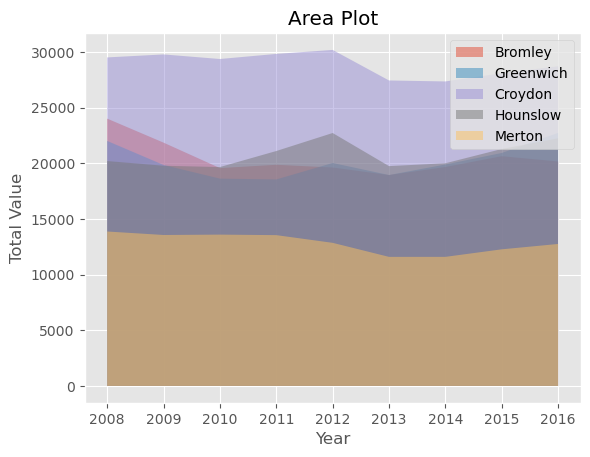

In [ ]:
0.5# Filter borough yang dipilih
df_filtered = df[(df['borough'].isin(['Bromley', 'Greenwich', 'Croydon', 'Hounslow', 'Merton']))]

# Grouping hasil filter berdasarkan tahun dan sum nilai
df_area = df_filtered.groupby(['borough', 'year'])['value'].sum().reset_index()    

# Plot area untuk masing-masing borough
for borough in ['Bromley', 'Greenwich', 'Croydon', 'Hounslow', 'Merton']:
    subset = df_area[df_area['borough'] == borough]
    plt.fill_between(subset['year'], subset['value'], label=borough, alpha=0.5)
    
# color_list = ['yellow','violet', 'khaki', 'skyblue', 'rebeccapurple']

# df_area.plot(kind='area', color=color_list)

plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Area Plot')
plt.legend()
plt.show()

In [ ]:
count_borough = df.groupby(by='borough')['value'].sum().reset_index()
count_borough.set_index('borough', inplace=True)
count_borough.sort_values(by='value', ascending=False)

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


#### 2: Histogram

In [ ]:
new_df = df.pivot_table(index='year', columns='borough', values='value', aggfunc='sum')
new_df.columns.name = None
new_df

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [ ]:
# create a new column 'Total'
new_df['Total'] = new_df.loc[:, 'Barking and Dagenham':'Westminster'].sum(axis=1)
new_df

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Total
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,29752,20873,11106,33470,12943,23578,24080,23330,47846,738641
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,28610,20837,10618,30623,12240,21959,24761,23021,48456,717214
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,30728,20652,10601,31320,12032,23072,24818,22815,48116,715324
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,27978,21994,10896,30723,11068,24712,23714,21384,54243,724915
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,30067,21424,11168,30737,10948,26784,22647,24457,59226,737329
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,27577,19793,10439,31128,10057,26258,21903,22290,53852,686407
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,28005,19590,10456,28912,10443,25504,20271,21364,47564,680183
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,29217,18897,10413,30260,10598,27493,20969,22401,47395,711624
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,30090,19502,11074,31636,10658,29253,20716,23679,48330,736121


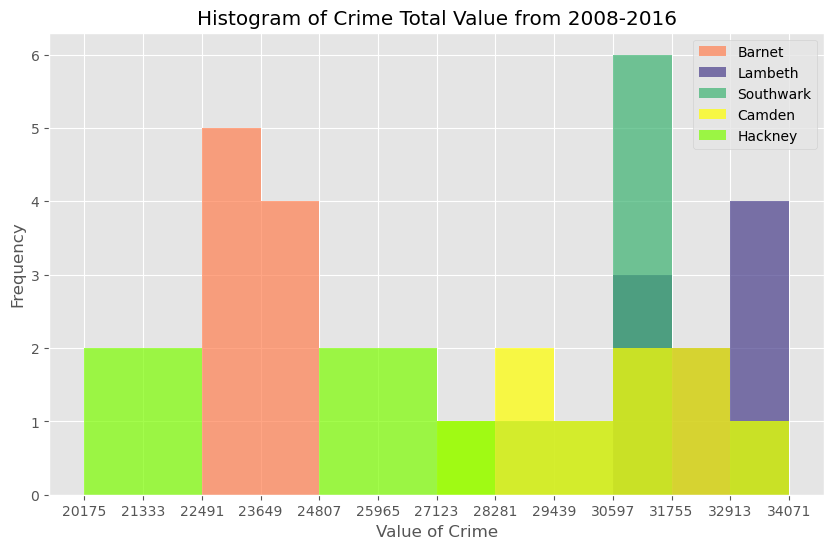

In [ ]:
hist_df = new_df[['Barnet', 'Lambeth', 'Southwark', 'Camden', 'Hackney']]

count, bin_edges = np.histogram(hist_df, 12)

hist_df.plot(
    kind='hist',
    figsize=(10,6),
    bins=12,
    alpha=0.7,
    xticks=bin_edges,
    color=['coral', 'darkslateblue', 'mediumseagreen', 'yellow', 'lawngreen']
)

plt.title('Histogram of Crime Total Value from 2008-2016')
plt.xlabel('Value of Crime')
plt.legend()
plt.show()

#### 3: Bar Chart

In [ ]:
major = df.groupby(by='major_category')['major_category'].count()
major

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
Name: major_category, dtype: int64

In [ ]:
major_sorted = major.sort_values(ascending=False).head(5)
major_sorted

major_category
Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Name: major_category, dtype: int64

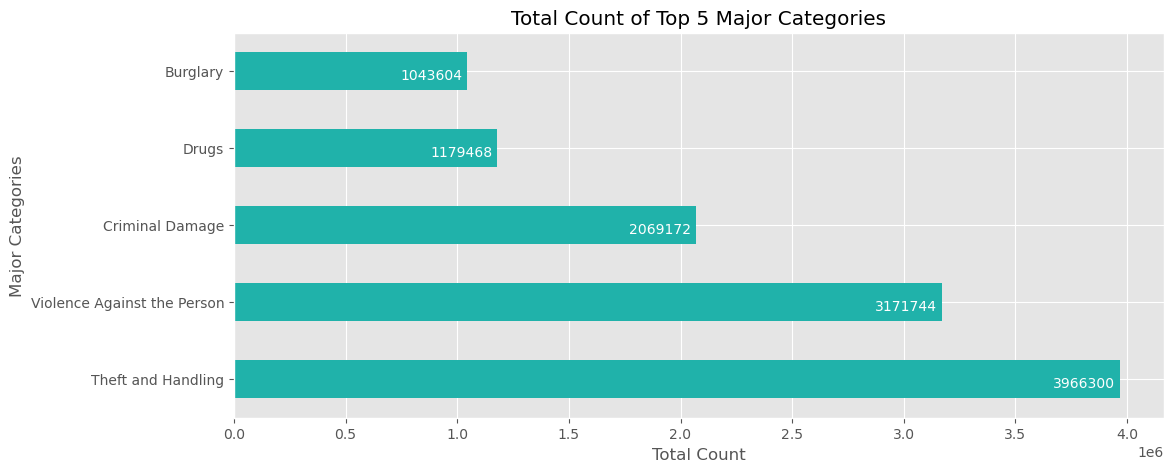

In [ ]:
major_sorted.plot(kind='barh', figsize=(12, 5), color='lightseagreen', )

plt.ylabel('Major Categories')
plt.xlabel('Total Count')
plt.title('Total Count of Top 5 Major Categories')
for index, value in enumerate(major_sorted):
    label = format(int(value), '-') 
    plt.annotate(label, xy=(value - 300000, index - 0.10), color='white')

plt.show()

#### 4: Pie Chart
```
Dalam visualisasi bentuk Pie Chart ini akan menampilkan informasi 5 daerah teratas berdasarkan jumlah total kejahatan yang terjadi.
Atau dengan kata lain grafik Pie Chart ini menunjukkan 5 nama daerah dengan tingkat kriminalitas tertinggi.
```

In [ ]:
df_borough = df.groupby(by='borough')['value'].sum().reset_index()
df_sorted_desc = df_borough.sort_values('value', ascending=False)
df_top5 =  df_sorted_desc.head(5)
df_top5.set_index('borough', inplace=True)
df_top5

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


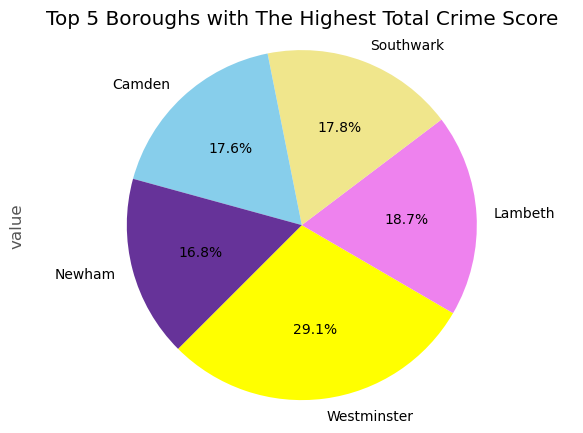

In [ ]:
colors_list =['yellow','violet', 'khaki', 'skyblue', 'rebeccapurple']

df_top5['value'].plot(kind='pie',
                 figsize=(7,5),
                 autopct='%1.1f%%',
                 startangle=225,
                 shadow=False,
                 colors=colors_list)

plt.title('Top 5 Boroughs with The Highest Total Crime Score')
plt.axis('equal')
plt.show()

#### 5: Box Plot

In [ ]:
df.groupby(by='major_category')['value'].sum().sort_values(ascending=False)

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

In [ ]:
new_df2 = df.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')
new_df2.columns.name = None
new_df2

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [ ]:
# choose major category data
df_box_major = new_df2[['Drugs', 'Criminal Damage', 'Burglary']]
df_box_major

,Drugs,Criminal Damage,Burglary
year,,,
2008,68804,91872,88092
2009,60549,85565,90619
2010,58674,77897,86826
2011,57550,70914,93315
2012,51776,62158,93392
2013,50278,56206,87222
2014,44435,59279,76053
2015,39785,62976,70489
2016,38914,64071,68285


In [ ]:
df_box_major.describe()

,Drugs,Criminal Damage,Burglary
count,9.000000,9.000000,9.000000
mean,52307.222222,70104.222222,83810.333333
std,10066.338892,12424.545824,9658.166674
min,38914.000000,56206.000000,68285.000000
25%,44435.000000,62158.000000,76053.000000
50%,51776.000000,64071.000000,87222.000000
75%,58674.000000,77897.000000,90619.000000
max,68804.000000,91872.000000,93392.000000


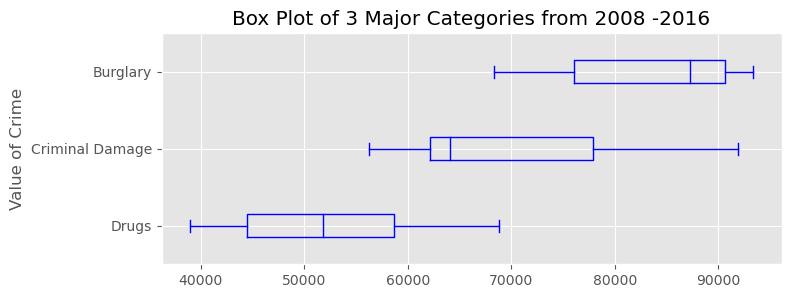

In [ ]:
df_box_major.plot(kind='box', figsize=(8,3), color='blue', vert=False)

plt.title('Box Plot of 3 Major Categories from 2008 -2016')
plt.ylabel('Value of Crime')

plt.show()

#### 6: Scatter Plot

```
mengidentifikasi tren total kejahatan per bulannya dari 2008-2016.
var.x = year
var.y = month
scatter = value
```

In [15]:
new_df3 = df.pivot_table(index='year', columns=['month'], values='value', aggfunc='sum')
new_df3.columns.name = None

In [16]:
new_df3['Total'] = new_df3.loc[:, 1:12].sum(axis=1)
new_df3

,1,2,3,4,5,6,7,8,9,10,11,12,Total
year,,,,,,,,,,,,,
2008,65419,62626,61343,59640,62587,62290,64126,59959,58414,63354,61395,57488,738641
2009,59142,54706,63482,59181,62897,63116,63281,58695,57847,61176,59456,54235,717214
2010,54934,55069,63629,60085,62126,62632,63764,59040,59731,62113,60665,51536,715324
2011,57966,54895,61282,58714,62630,61822,62428,59117,58640,63622,64119,59680,724915
2012,62436,56735,67537,58801,64344,62281,63280,62143,56912,61728,62514,58618,737329
2013,58933,55271,57590,55678,56765,56839,60508,57467,54924,59956,58267,54209,686407
2014,55515,51222,57669,53467,56327,57039,58564,55641,56933,60537,59704,57565,680183
2015,57055,53316,60096,56445,61038,60760,61606,58056,57564,62361,62487,60840,711624
2016,58847,56697,59167,58637,63990,62262,65519,62666,61412,63405,61064,62455,736121


In [18]:
new_df3.index = map(int, new_df3.index)

In [19]:
new_df3.index.name = 'Year'

In [20]:
new_df3.reset_index(inplace=True)

In [21]:
new_df3.describe()

,Year,1,2,3,4,5,6,7,8,9,10,11,12,Total
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2012.000000,58916.333333,55615.222222,61310.555556,57849.777778,61411.555556,61004.555556,62564.000000,59198.222222,58041.888889,62028.000000,61074.555556,57402.888889,716417.555556
std,2.738613,3288.701872,3120.981968,3202.231063,2183.559295,2924.328688,2392.047351,2085.725593,2194.210495,1843.936783,1306.020865,1802.314006,3512.293497,21301.370555
min,2008.000000,54934.000000,51222.000000,57590.000000,53467.000000,56327.000000,56839.000000,58564.000000,55641.000000,54924.000000,59956.000000,58267.000000,51536.000000,680183.000000
25%,2010.000000,57055.000000,54706.000000,59167.000000,56445.000000,61038.000000,60760.000000,61606.000000,58056.000000,56933.000000,61176.000000,59704.000000,54235.000000,711624.000000
50%,2012.000000,58847.000000,55069.000000,61282.000000,58714.000000,62587.000000,62262.000000,63280.000000,59040.000000,57847.000000,62113.000000,61064.000000,57565.000000,717214.000000
75%,2014.000000,59142.000000,56697.000000,63482.000000,59181.000000,62897.000000,62290.000000,63764.000000,59959.000000,58640.000000,63354.000000,62487.000000,59680.000000,736121.000000
max,2016.000000,65419.000000,62626.000000,67537.000000,60085.000000,64344.000000,63116.000000,65519.000000,62666.000000,61412.000000,63622.000000,64119.000000,62455.000000,738641.000000


In [22]:
new_df3.columns

Index(['Year', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Total'], dtype='object')

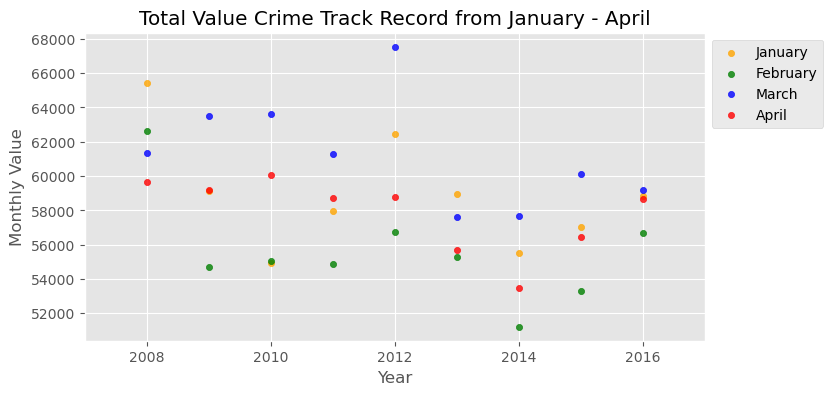

In [23]:
ax = new_df3.plot(kind='scatter', x='Year', y=1, figsize=(8,4), color='orange', alpha=0.8, xlim=(2007, 2017), label='January')
new_df3.plot(kind='scatter', x='Year', y=2, color='green', alpha=0.8, ax=ax, label='February')
new_df3.plot(kind='scatter', x='Year', y=3, color='blue', alpha=0.8, ax=ax, label='March')
new_df3.plot(kind='scatter', x='Year', y=4, color='red', alpha=0.8, ax=ax, label='April')

     
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Value')
ax.set_title('Total Value Crime Track Record from January - April')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

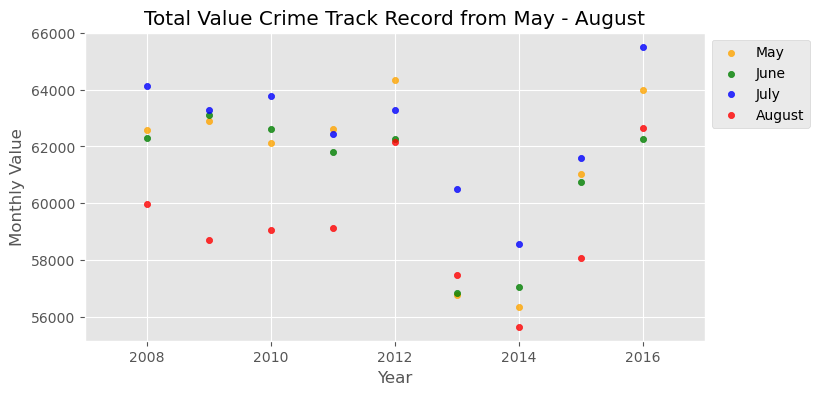

In [ ]:
ax = new_df3.plot(kind='scatter', x='Year', y=5, figsize=(8,4), color='orange', alpha=0.8, xlim=(2007, 2017), label='May')
new_df3.plot(kind='scatter', x='Year', y=6, color='green', alpha=0.8, ax=ax, label='June')
new_df3.plot(kind='scatter', x='Year', y=7, color='blue', alpha=0.8, ax=ax, label='July')
new_df3.plot(kind='scatter', x='Year', y=8, color='red', alpha=0.8, ax=ax, label='August')
     
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Value')
ax.set_title('Total Value Crime Track Record from May - August')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

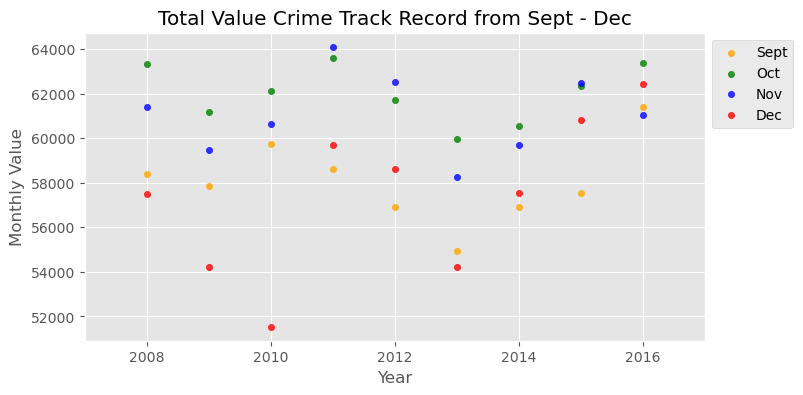

In [ ]:
ax = new_df3.plot(kind='scatter', x='Year', y=9, figsize=(8,4), color='orange', alpha=0.8, xlim=(2007, 2017), label='Sept')
new_df3.plot(kind='scatter', x='Year', y=10, color='green', alpha=0.8, ax=ax, label='Oct')
new_df3.plot(kind='scatter', x='Year', y=11, color='blue', alpha=0.8, ax=ax, label='Nov')
new_df3.plot(kind='scatter', x='Year', y=12, color='red', alpha=0.8, ax=ax, label='Dec')
     
ax.set_xlabel('Year')
ax.set_ylabel('Monthly Value')
ax.set_title('Total Value Crime Track Record from Sept - Dec')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#### 7: WordCloud
```
Dalam visualisasi bentuk WordCloud ini akan menampilkan informasi nama daerah dari total kejahatan yang terjadi.
Semakin besar tulisan kata yang dihasilkan dalam visualisasi menunjukkan bahwa daerah tersebut tinggi kasus kejahatannya.
```

In [ ]:
# create a dataframe for wordcloud

# get the data
borough_data = df.groupby(by='borough')['value'].sum().reset_index()

# add new columns for new dataframe
borough_wc = borough_data[['borough', 'value']]
borough_wc

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


In [ ]:
# prepared data for wordcloud
wc_dict = dict(zip(borough_wc['borough'], borough_wc['value']))
wc_dict

{'Barking and Dagenham': 149447,
 'Barnet': 212191,
 'Bexley': 114136,
 'Brent': 227551,
 'Bromley': 184349,
 'Camden': 275147,
 'City of London': 780,
 'Croydon': 260294,
 'Ealing': 251562,
 'Enfield': 193880,
 'Greenwich': 181568,
 'Hackney': 217119,
 'Hammersmith and Fulham': 185259,
 'Haringey': 213272,
 'Harrow': 116848,
 'Havering': 138947,
 'Hillingdon': 209680,
 'Hounslow': 186772,
 'Islington': 230286,
 'Kensington and Chelsea': 171981,
 'Kingston upon Thames': 89306,
 'Lambeth': 292178,
 'Lewisham': 215137,
 'Merton': 115654,
 'Newham': 262024,
 'Redbridge': 183562,
 'Richmond upon Thames': 96771,
 'Southwark': 278809,
 'Sutton': 100987,
 'Tower Hamlets': 228613,
 'Waltham Forest': 203879,
 'Wandsworth': 204741,
 'Westminster': 455028}

In [ ]:
# create wordcloud
london_wordcloud = WordCloud(width=800,
                             height=400,
                             background_color='white'
                             ).generate_from_frequencies(wc_dict)

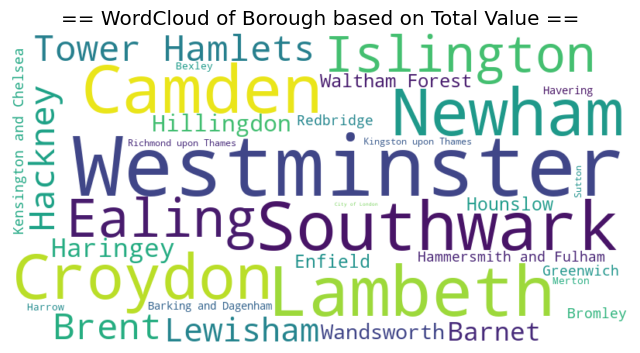

In [ ]:
# create wordcloud figure and show
plt.figure(figsize=(8, 7))
plt.imshow(london_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('== WordCloud of Borough based on Total Value ==')
plt.show()

#### 8: Folium Maps